### Learners Space 2024
Machine learning 

Sarvesh Patil

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

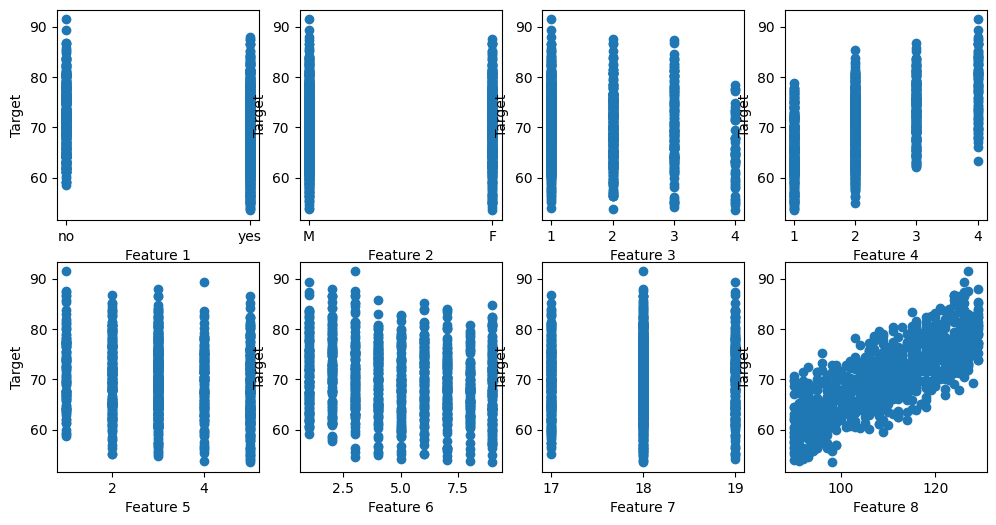

  internet sex  traveltime  studytime  freetime  absences  age   iq  marks
0       no   M           2          2         5         6   18  118  73.13
1      yes   M           2          2         2         7   19  107  67.78
2      yes   M           3          3         3         5   18  108  70.84
3       no   F           3          3         4         9   17  100  66.68
4      yes   M           1          4         3         4   19   96  71.88


In [106]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
fig, axs = plt.subplots(2, 4, figsize=(12, 6))  # 2 rows, 4 columns

for i in range(8):
    axs[i // 4, i % 4].scatter(x_train[:, i], y_train)
    axs[i // 4, i % 4].set_xlabel(f'Feature {i+1}')
    axs[i // 4, i % 4].set_ylabel('Target')

plt.show()

# To get an idea whether to add some features or not
print(data.head())

# Add some features if required in x_train

# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    for i in range(len(x_train)):
          if x_train[i,0] == 'no':      # 0 if no and 1 if yes
               x_train[i,0] = 0
          else:
              x_train[i,0] = 1
    for i in range(len(x_train)):
          if x_train[i,1] == 'M':     # 0 for male and 1 for female 
               x_train[i,1] = 0
          else:
              x_train[i,1] = 1
    return x_train

x_train = feature_changing(x_train)

In [107]:
def z_score(x_train):
  x_mean = np.mean(x_train)
  x_std = np.std(x_train)
  x_train = (x_train - x_mean)/x_std
  return x_train,x_std,x_mean

In [108]:
def cost(x_train,y_train,w,b):
   y_pred = np.dot(x_train,w) + b
   diff = y_pred - y_train
   sq = (diff)**2
   loss = np.mean(sq)
   return loss

In [109]:
def gradient_descent(x_train,y_train,w,b):
  LR = 0.005
  for j in range(len(w)):
    a = []
    for i in range(len(x_train[:,1])):
      a.append((np.dot(w[:,0],x_train[i]) + b - y_train[i])*x_train[i][j])
    w[j] = w[j] - LR*np.mean(a)

  y_pred = np.dot(x_train,w) + b
  diff = y_pred - y_train
  b = b- LR*np.mean(diff)
  return w,b

In [111]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.0001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
  #print(old_cost)
  print(old_cost - cost(x_train,y_train,w,b))
print("Training done")


435.9861981755139
398.1118504028427
363.52767472082087
331.94785139162923
303.1113900586015
276.77997279853935
252.73598454975036
230.78071463834885
210.73271453937605
192.42629830049577
175.71017323506203
160.44618956793943
146.5081987005849
133.78101065951955
122.1594421120808
111.54744708177441
101.85732317907741
93.00898678758176
84.92931121528522
77.5515223411993
70.81464676260259
64.66300788217472
59.045765770435764
53.91649700068888
49.2328109840314
44.95599963364373
41.05071746300683
37.48468947424692
34.228444422433085
31.25507125142593
28.53999668832114
26.06078215844377
23.796938342491615
21.72975584324135
19.84215056237028
18.118522509514406
16.544626876689335
15.107456312578108
13.795133423741305
12.596812614328314
11.502590453052164
10.503423826648827
9.59105520341312
8.757944389143987
7.997206211507759
7.302553617803113
6.668245715870654
6.089040328726242
5.5601506708097475
5.077205787800963
4.636214433058669
4.233532082140684
3.8658308127971353
3.530071801512122
3.22348

In [112]:
print(old_cost - cost(x_train,y_train,w,b))


9.999896855461543e-05


In [116]:
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict,x_std,x_mean = z_score(x_predict)
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 9.5%


In [ ]:
for i in range(len(ans)):
    print(y_predict[i]-ans[i])

[-2.4834734715020517]
[-1.5638244240473256]
[-7.377649903649967]
[3.7636858671456253]
[3.427496854456365]
[-4.250246965718219]
[-2.9772029788169476]
[-4.362790157574921]
[0.8845686913125803]
[-3.6428813226831522]
[0.09913034544537425]
[2.9794051206068843]
[0.5774414202929137]
[1.006284577049442]
[-1.3875539217991957]
[-1.3474900754690111]
[4.176798704911384]
[-6.183348609529375]
[5.228191320318572]
[5.870496053017213]
[1.3711421531485541]
[-3.222978543955705]
[-5.713693268939409]
[1.4513770073513115]
[-5.655262462682174]
[-6.827575708795862]
[-1.5775511995264253]
[1.5528720001982066]
[1.2989703014215195]
[-1.780306506611339]
[-1.5299754807923165]
[3.1732714396721207]
[1.3522227333647407]
[-1.5934503575173835]
[-2.2292475480519585]
[0.9598888567275452]
[-4.024559811806725]
[-5.387929339958049]
[0.5665782036767837]
[0.7730960975493844]
[4.938276553257282]
[3.7855312668889596]
[-3.704013817602572]
[0.05081791009827441]
[4.796852875692224]
[-2.224393398411337]
[1.6300655233093835]
[-0.9590